In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

## hadamard

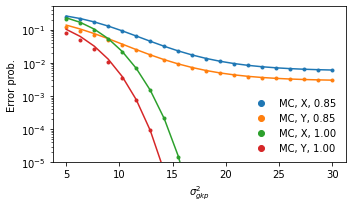

In [57]:
repeat = 24
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])


plt.figure(1,figsize=(5,3))

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2


for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    first = True
    for i_rep in range(repeat):
        # fname = "data_hadamard/" + "sc_eq_sgkp_p_%.2f_i_%d.npz" % (η,i_rep)
        fname = "data_hadamard/" + "sc_0_p_%.2f_i_%d.npz" % (η,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            σ2_list, probX_mc, probY_mc, probZ_mc, Nrep = npz_file['σ2_list'], npz_file['probX_mc'], npz_file['probY_mc'], npz_file['probZ_mc'], npz_file['Nrep']

            if first :
                first = False
                probX_avg = np.zeros(len(σ2_list))
                probY_avg = np.zeros(len(σ2_list))
                probZ_avg = np.zeros(len(σ2_list))
                Ntot = 0
                prob_X = np.zeros((len(η_list),len(σ2_list)))
                prob_Y = np.zeros((len(η_list),len(σ2_list)))

            probX_avg += probX_mc*Nrep
            probY_avg += probY_mc*Nrep
            probZ_avg += probZ_mc*Nrep
            Ntot += Nrep
    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = 0*σgkp2
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_n,i_s] = Xerr*(1-Yerr)**3+ Yerr*(1-Xerr)*(1-Yerr)**2+ Yerr**2*(1-Xerr)*(1-Yerr)+ Xerr**3
        prob_Y[i_n,i_s] = Yerr*(1-Yerr)**2+ Yerr**2*(1-Yerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X[i_n,:],"-", color="C%d" % (2*i_n))
    plt.plot(-10*np.log10(2*σ2_list),prob_Y[i_n,:],"-", color="C%d" % (2*i_n+1))

    if not first:
        plt.plot(-10*np.log10(2*σ2_list),probX_avg/Ntot,".", color="C%d" % (2*i_n), linewidth=1,label="MC, X, %.2f" % (η))
        plt.plot(-10*np.log10(2*σ2_list),probY_avg/Ntot,".", color="C%d" % (2*i_n+1), linewidth=1,label="MC, Y, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (i_n+2), linewidth=1,label="MC, Z, %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$σ^2_{gkp}$")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## S gate

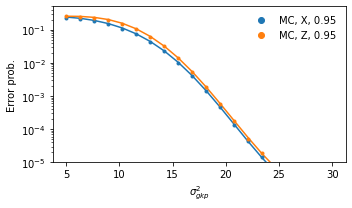

In [133]:
repeat = 24
η_list =  [0.95]#np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2


for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    first = True
    for i_rep in range(repeat):
        fname = "data_Sgate/" + "sc_eq_sgkp_p_%.2f_i_%d.npz" % (η,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            σ2_list, probX_mc, probY_mc, probZ_mc, Nrep = npz_file['σ2_list'], npz_file['probX_mc'], npz_file['probY_mc'], npz_file['probZ_mc'], npz_file['Nrep']

            if first :
                first = False
                probX_avg = np.zeros(len(σ2_list))
                probY_avg = np.zeros(len(σ2_list))
                probZ_avg = np.zeros(len(σ2_list))
                Ntot = 0
                prob_X = np.zeros((len(η_list),len(σ2_list)))
                prob_Z = np.zeros((len(η_list),len(σ2_list)))

            probX_avg += probX_mc*Nrep
            probY_avg += probY_mc*Nrep
            probZ_avg += probZ_mc*Nrep
            Ntot += Nrep
    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_n,i_s] = Xerr*(1-Xerr)
        # prob_Z[i_n,i_s] = Xerr**2 *(Xerr*Yerr+(1-Xerr)*(1-Yerr))+ (1-Xerr)**2 *(Xerr*(1-Yerr)+Yerr*(1-Xerr))
        prob_Z[i_n,i_s] = Xerr+ Yerr -4*Xerr*Yerr-Xerr**2 *(1-4*Yerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X[i_n,:],"-", color="C%d" % (2*i_n))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z[i_n,:],"-", color="C%d" % (2*i_n+1))

    if not first:
        plt.plot(-10*np.log10(2*σ2_list),probX_avg/Ntot,".", color="C%d" % (2*i_n), linewidth=1,label="MC, X, %.2f" % (η))
        plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (2*i_n+1), linewidth=1,label="MC, Z, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (i_n+2), linewidth=1,label="MC, Z, %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$σ^2_{gkp}$")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## cnot

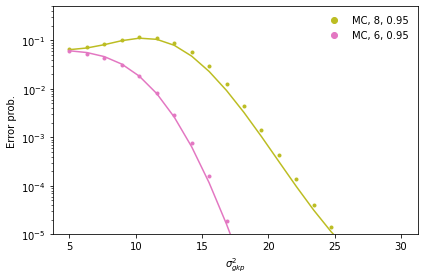

In [118]:
repeat = 24
η_list =  [0.95]#np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

# plt.figure(1,figsize=(5,3))

for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    first = True
    for i_rep in range(repeat):
        fname = "data_cnot/" + "sc_eq_sgkp_p_%.2f_i_%d.npz" % (η,i_rep)
        # fname = "data_cnot/" + "sc_0_p_%.2f_i_%d.npz" % (η,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            # σ2_list, XX, YX, ZX, Nrep = npz_file['σ2_list'], npz_file['XX'], npz_file['YX'], npz_file['ZX'], npz_file['Nrep']
            σ2_list, err_mc, Nrep = npz_file['σ2_list'], npz_file['err_mc'], npz_file['Nrep']

            if first :
                first = False
                # XX_avg = np.zeros(len(σ2_list))
                # YX_avg = np.zeros(len(σ2_list))
                # ZX_avg = np.zeros(len(σ2_list))
                err_mc_avg = np.zeros((16,len(σ2_list)))
                Ntot = 0

            # XX_avg += XX*Nrep
            # YX_avg += YX*Nrep
            # ZX_avg += ZX*Nrep
            err_mc_avg += err_mc*Nrep
            Ntot += Nrep
    err_prob = cnot_error_calc(σ2_list,σm2)
    # [sz_c%2,sx_c%2,sz_t%2,sx_t%2] # numbering scheme
    # i_xx = np.array([0,1,0,1])@ (2**np.arange(4))
    # plt.plot(-10*np.log10(2*σ2_list),err_prob[i_xx,:],"-", color="C%d" % (3*i_n))
    # i_yx = np.array([1,1,0,1])@ (2**np.arange(4))
    # plt.plot(-10*np.log10(2*σ2_list),err_prob[i_yx,:],"-", color="C%d" % (3*i_n+1))
    # i_zx = np.array([1,0,0,1])@ (2**np.arange(4))
    # plt.plot(-10*np.log10(2*σ2_list),err_prob[i_zx,:],"-", color="C%d" % (3*i_n+2))

    if not first:
        # i_xx = np.array([1,0,1,1])@ (2**np.arange(4))
        # i_xx = np.random.randint(16)
        # for i_xx in range(16):
        for i_xx in [8,6]:
            # plt.figure(i_xx)
            plt.plot(-10*np.log10(2*σ2_list),err_prob[i_xx,:],"-", color="C%d" % (i_xx))
            plt.plot(-10*np.log10(2*σ2_list),err_mc_avg[i_xx,:]/Ntot,".", color="C%d" % (i_xx), linewidth=1,label="MC, %d, %.2f" % (i_xx,η))
        # plt.plot(-10*np.log10(2*σ2_list),XX_avg/Ntot,".", color="C%d" % (3*i_n), linewidth=1,label="MC, X, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),YX_avg/Ntot,".", color="C%d" % (3*i_n+1), linewidth=1,label="MC, Y, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),ZX_avg/Ntot,".", color="C%d" % (3*i_n+2), linewidth=1,label="MC, Z, %.2f" % (η))

            plt.yscale("log")
            # plt.xscale("log")
            if i_xx>0:
                plt.ylim(1e-5,5e-1)
            else:
                plt.ylim(5e-2,2)
            # plt.xlim(4,31)
            plt.xlabel(r"$σ^2_{gkp}$")
            plt.ylabel("Error prob.")
            # plt.grid()
            plt.legend(frameon=False,markerscale=2)
            plt.tight_layout()
            # plt.grid()
            # plt.savefig("figs/qdot-threshold.pdf")
            # plt.show()

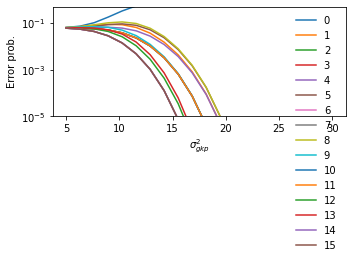

In [82]:
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states


def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2

def cnot_error_calc(σ2_list,σm2):
    Nq = 13
    vec = Hilbertspace_Zr(Nq,2)

    # qubits measured in X or Y basis
    X_list = [0,7,8,9,11,12]
    Y_list = [1,2,3,4,5,6,10]
    Nx = len(X_list)+1
    Ny = len(Y_list)+1

    err_vec = np.zeros((16,Ny*Nx),dtype=int)
    for i in range(2**Nq):
        s_flip=vec[i,:]

        sz_c = np.sum(vec[i,[0,2,3,4,6,7,9]])
        sx_c = np.sum(vec[i,[1,2,4,5]])
        sz_t = np.sum(vec[i,[7,9,11]])
        sx_t = np.sum(vec[i,[1,2,6,8,10,12]])
        px_exp = np.sum(vec[i,X_list])
        py_exp = np.sum(vec[i,Y_list])

        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        err_vec[i_e,py_exp*Nx + px_exp] += 1

    # σ2_list = np.logspace(-3,-0.5,20)/2
    # σm2 = 0.
    err_prob = np.zeros((16,len(σ2_list)))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        px_vec = Xerr**np.arange(Nx)*(1-Xerr)**np.arange(Nx-1,-1,-1)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        py_vec = Yerr**np.arange(Ny)*(1-Yerr)**np.arange(Ny-1,-1,-1)
        p_vec = np.kron(py_vec,px_vec)
        err_prob[:,i_s] = err_vec @ p_vec    
    return err_prob

# plt.figure(figsize=(5,3))
# for i_e in range(16):
#     plt.plot(-10*np.log10(2*σ2_list),err_prob[i_e,:],label="%d" % i_e)
# # plt.plot(p_list,np.sum(err_prob,axis=0))
# plt.yscale("log")
# # plt.xscale("log")
# plt.ylim(1e-5,5e-1)
# # plt.xlim(4,31)
# plt.xlabel(r"$σ^2_{gkp}$")
# plt.ylabel("Error prob.")
# # plt.grid()
# plt.legend(frameon=False,markerscale=2)
# plt.tight_layout()
# # plt.grid()
# # plt.savefig("figs/qdot-threshold.pdf")
# plt.show()